In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("C:\\Users\\Aaron\\Downloads\\HistoricalPrices.csv")
data = data.iloc[::-1]
data.head()

,Date,Open,High,Low,Close,Volume
3482,09/09/10,102.50,102.50,101.140,101.320,26513.0
3481,09/10/10,101.68,101.86,101.296,101.780,8638.0
3480,09/13/10,102.96,103.14,102.500,103.060,33752.5
3479,09/14/10,102.84,103.48,102.380,103.038,59420.0
3478,09/15/10,102.62,103.38,102.400,103.300,9283.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3483 entries, 3482 to 0
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     3483 non-null   object 
 1    Open    3483 non-null   float64
 2    High    3483 non-null   float64
 3    Low     3483 non-null   float64
 4    Close   3483 non-null   float64
 5    Volume  3483 non-null   float64
dtypes: float64(5), object(1)
memory usage: 163.4+ KB


In [6]:
#splitting data into train and test

length_data = len(data)
split_ratio = 0.7
length_train = round(length_data * split_ratio)
length_test = length_data - length_train
print("Data, train, validation length:", length_data, length_train, length_test)

train_data = data[:length_train].iloc[:, :2]
train_data['Date'] = pd.to_datetime(train_data['Date'])
print(train_data)

test_data = data[length_train:].iloc[:,:2]
test_data['Date'] = pd.to_datetime(test_data['Date']) 
print(test_data)

Data, train, validation length: 3483 2438 1045
           Date    Open
3482 2010-09-09  102.50
3481 2010-09-10  101.68
3480 2010-09-13  102.96
3479 2010-09-14  102.84
3478 2010-09-15  102.62
...         ...     ...
1049 2020-05-11  266.78
1048 2020-05-12  269.98
1047 2020-05-13  262.87
1046 2020-05-14  256.33
1045 2020-05-15  259.54

[2438 rows x 2 columns]
           Date    Open
1044 2020-05-18  269.32
1043 2020-05-19  270.61
1042 2020-05-20  271.92
1041 2020-05-21  272.80
1040 2020-05-22  270.76
...         ...     ...
4    2024-07-08  510.50
3    2024-07-09  511.21
2    2024-07-10  511.98
1    2024-07-11  516.00
0    2024-07-12  512.49

[1045 rows x 2 columns]


In [7]:
#creating train dataset from train split 

train_data.columns = train_data.columns.str.strip()
dataset_train = train_data['Open'].values
print(dataset_train.shape)

dataset_train = np.reshape(dataset_train, (-1,1))
print(dataset_train.shape)

(2438,)
(2438, 1)


In [8]:
#normalizing 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
dataset_train_scaled = scaler.fit_transform(dataset_train)
dataset_train_scaled.shape

(2438, 1)

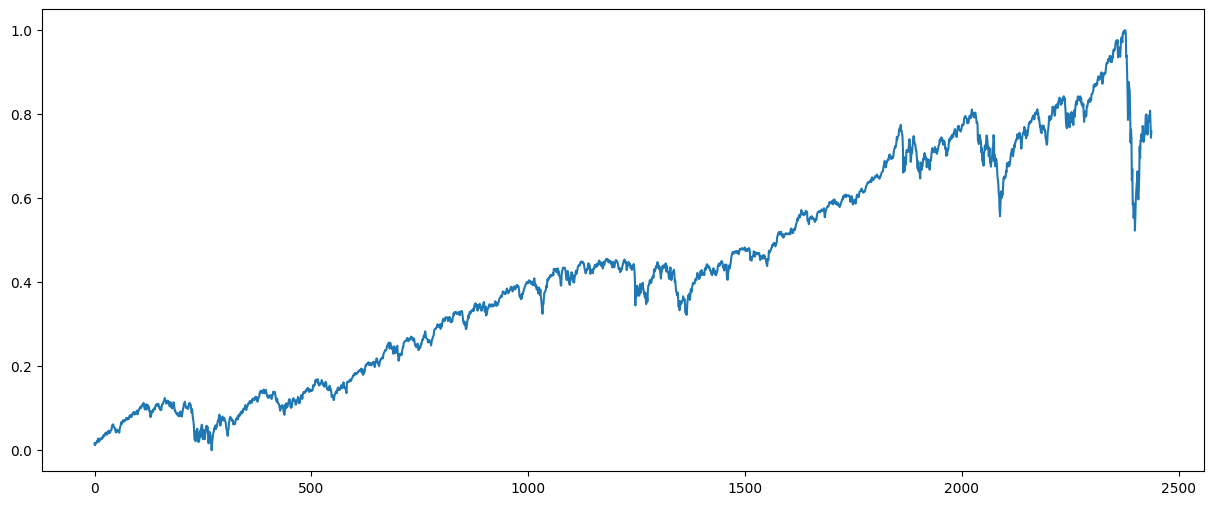

In [9]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)

In [10]:
#creating x_train and y_train from train data 

x_train = []
y_train = []
time_step = 50 

for i in range(time_step, length_train):
    x_train.append(dataset_train_scaled[i-time_step:i, 0])
    y_train.append(dataset_train_scaled[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

print("Shape of x_train, y_train before reshape:", x_train.shape, y_train.shape)

Shape of x_train, y_train before reshape: (2388, 50) (2388,)


In [11]:
#reshape 

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of x_train, y_train after reshape:", x_train.shape, y_train.shape)

Shape of x_train, y_train after reshape: (2388, 50, 1) (2388, 1)


In [12]:
#creating the RNN model

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

regressor = Sequential()


# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (x_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 8.6964e-04 - loss: 0.4102
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 4.2832e-04 - loss: 0.1677
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 1.9654e-04 - loss: 0.0867
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.9604e-04 - loss: 0.0602
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 5.5530e-04 - loss: 0.0432
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 3.1548e-04 - loss: 0.0297
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0012 - loss: 0.0249
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 3.0438e-04 - loss: 0.0199
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 9.0774e-04 - loss: 0.0171
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 5.1617e-04 - loss: 0.0134
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 3.2800e-04 - loss: 0.0123
Epoch 12/50
75/75 ━━━━━

In [13]:
history.history["loss"]

[0.301599383354187,
 0.1475190967321396,
 0.07859743386507034,
 0.05370253324508667,
 0.04179006814956665,
 0.029471583664417267,
 0.024059437215328217,
 0.019788820296525955,
 0.016686152666807175,
 0.012882356531918049,
 0.011304009705781937,
 0.011178375221788883,
 0.009172427468001842,
 0.008101505227386951,
 0.007196961436420679,
 0.0063461121171712875,
 0.006498598027974367,
 0.0056235212832689285,
 0.005260023754090071,
 0.0047195605002343655,
 0.0044627198949456215,
 0.004091106820851564,
 0.004265272058546543,
 0.0035489900037646294,
 0.003507868852466345,
 0.00331876240670681,
 0.003156795399263501,
 0.003002680605277419,
 0.00260757002979517,
 0.002501512411981821,
 0.002589939394965768,
 0.002393749775364995,
 0.0023849946446716785,
 0.002329388866201043,
 0.0022307229228317738,
 0.002235604217275977,
 0.001960492692887783,
 0.002157139591872692,
 0.0020099040120840073,
 0.0018445663154125214,
 0.0018797049997374415,
 0.0017908012960106134,
 0.0017237858846783638,
 0.001770

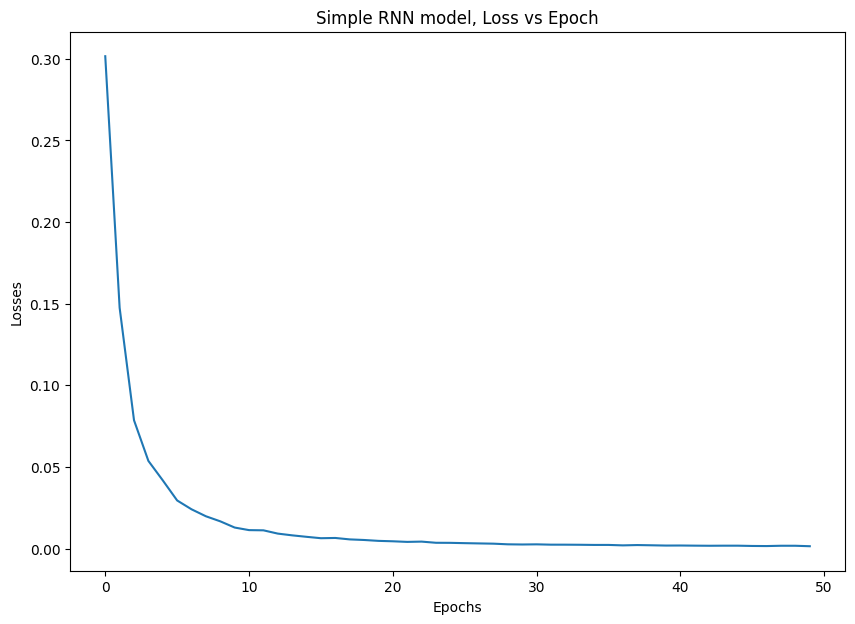

In [14]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

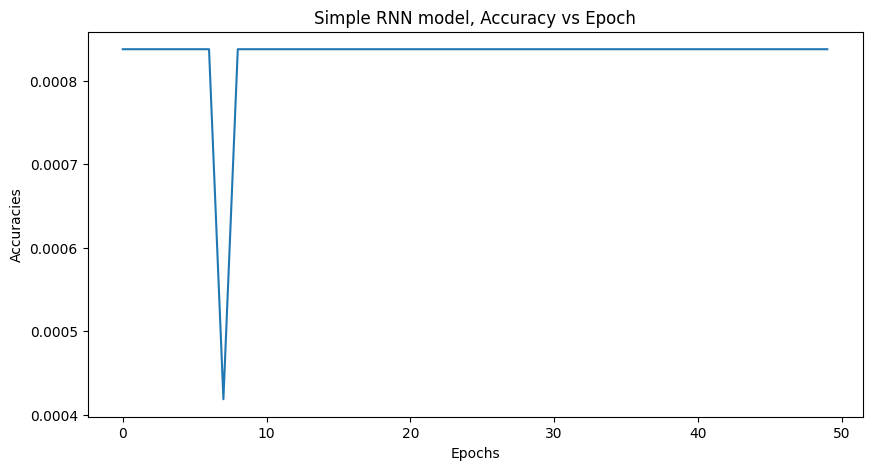

In [15]:
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [16]:
y_pred = regressor.predict(x_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


(2388, 1)

In [17]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(2388, 1)

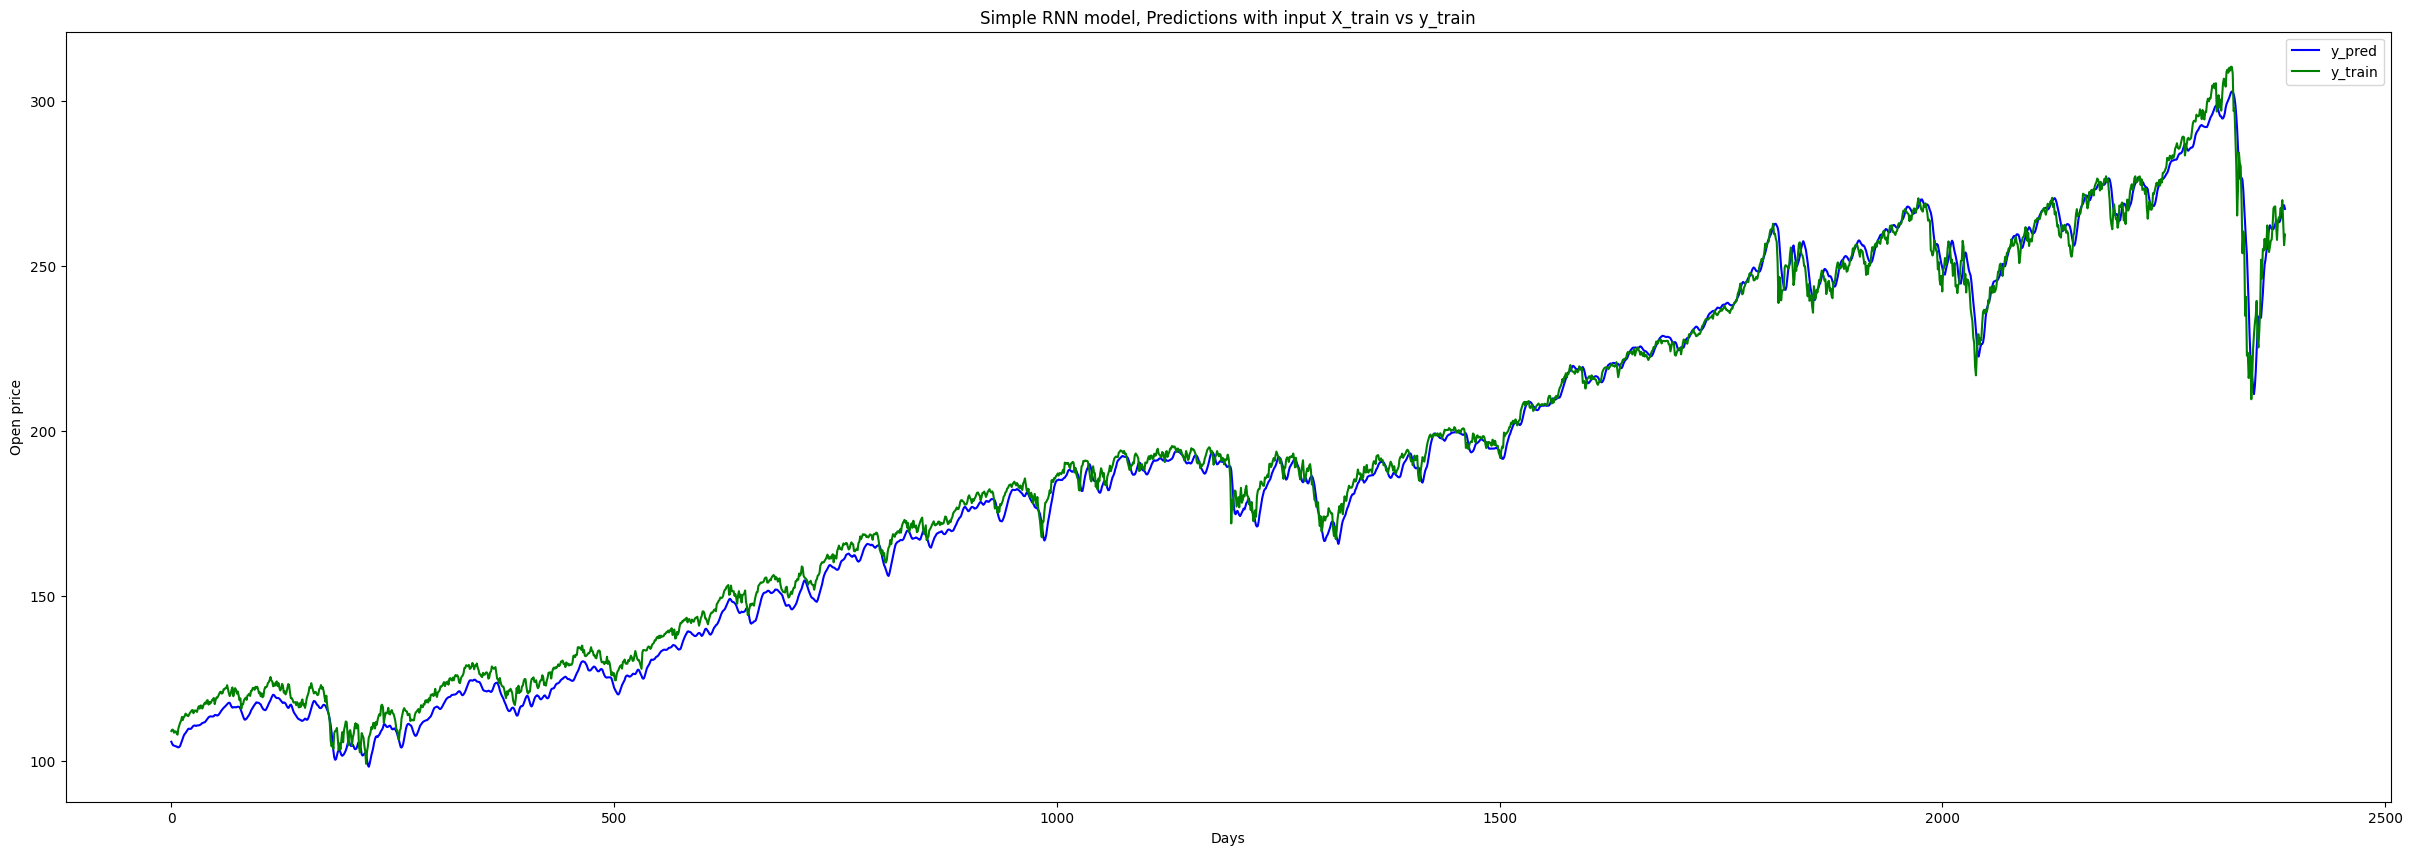

In [18]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [19]:
# Check and strip any leading/trailing spaces from column names
test_data.columns = test_data.columns.str.strip()

# Print column names to ensure 'Open' exists
print("Columns in DataFrame:", test_data.columns)

# Check if 'Open' column is in the DataFrame
if 'Open' in test_data.columns:
    # Access the 'Open' column
    dataset_validation = test_data['Open'].values  # getting "Open" column and converting to array
    dataset_validation = np.reshape(dataset_validation, (-1, 1))  # converting 1D to 2D array
    scaled_dataset_validation = scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
    print("Shape of scaled validation dataset:", scaled_dataset_validation.shape)
else:
    print("'Open' column not found in DataFrame")

Columns in DataFrame: Index(['Date', 'Open'], dtype='object')
Shape of scaled validation dataset: (1045, 1)


In [20]:
x_test = []
y_test = []

for i in range(time_step, length_test):
    x_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

import numpy as np

# Assuming x_test and y_test are lists, convert them to NumPy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

# Now you can check their shapes
print("Shape of X_test before reshape:", x_test.shape)
print("Shape of Y_test before reshape:", y_test.shape)

Shape of X_test before reshape: (995, 50)
Shape of Y_test before reshape: (995,)


In [21]:
X_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [22]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Shape of y_pred_of_test : (995, 1)


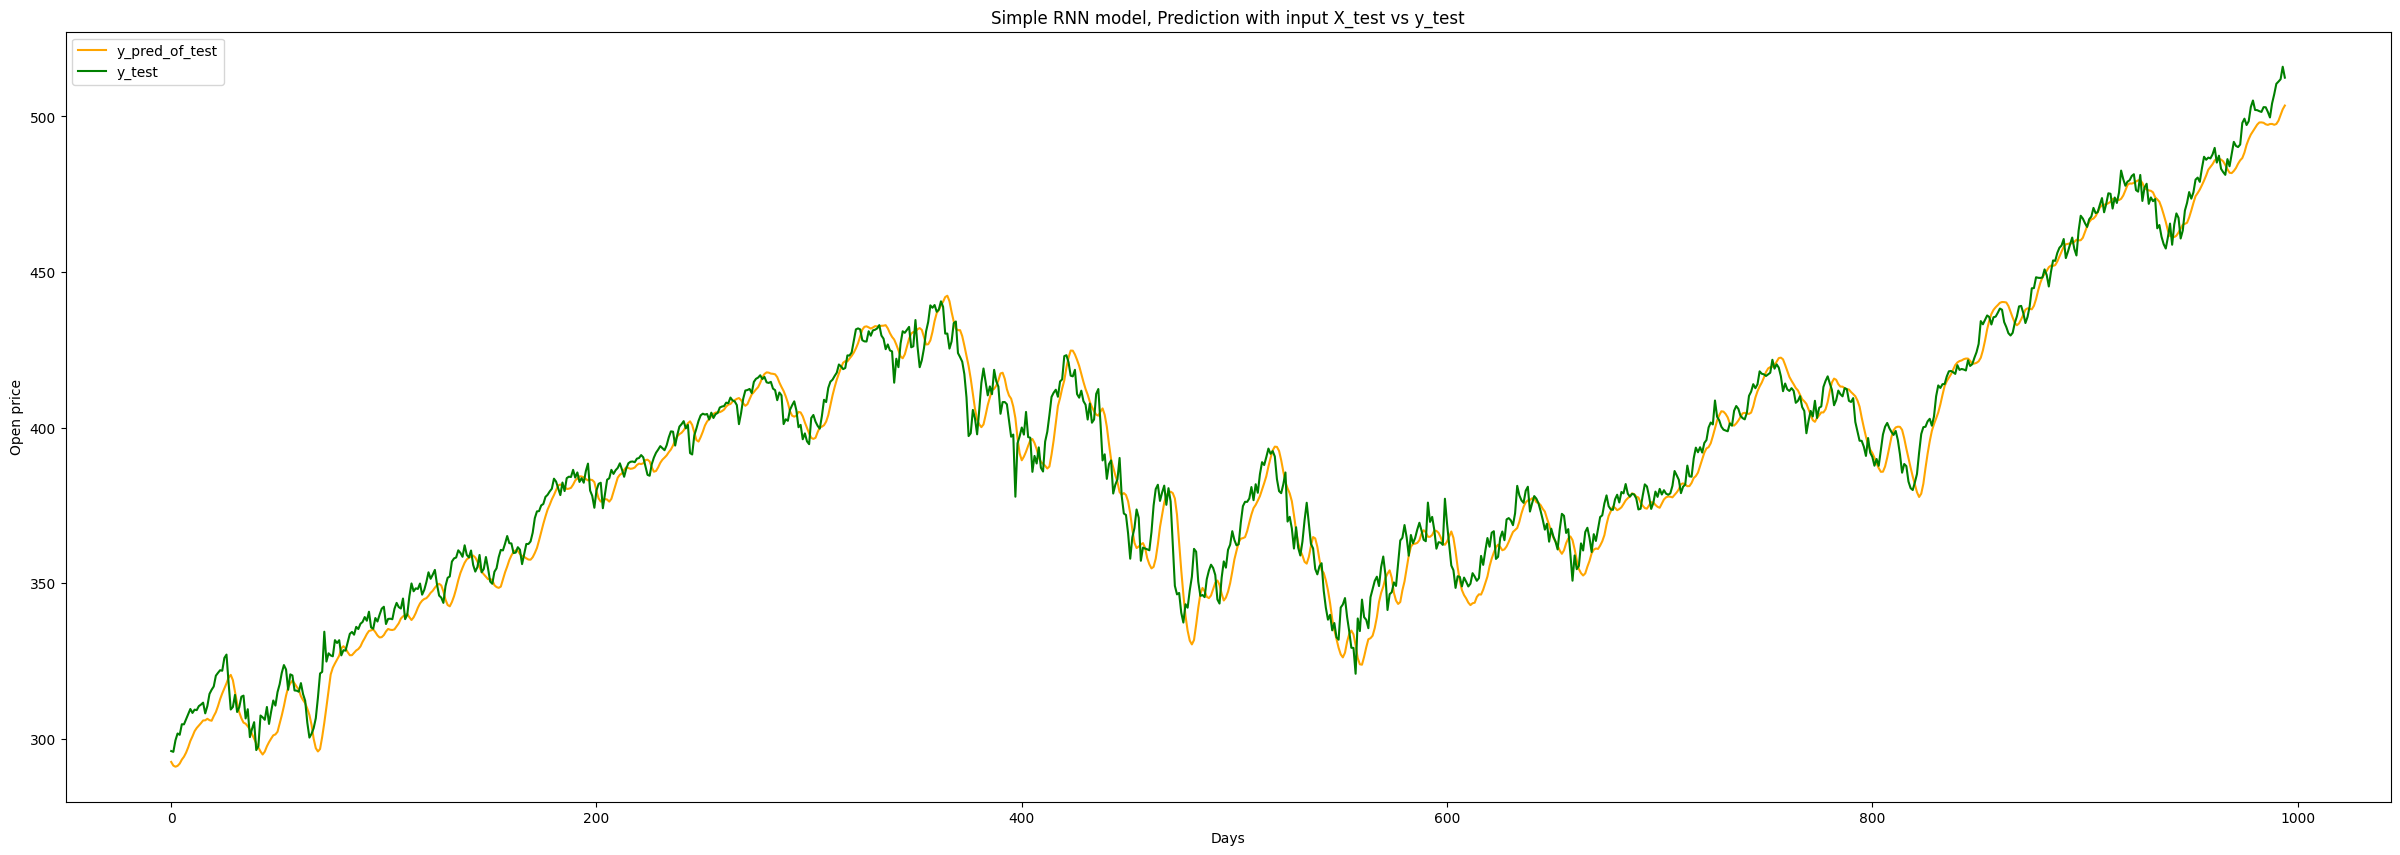

In [23]:
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

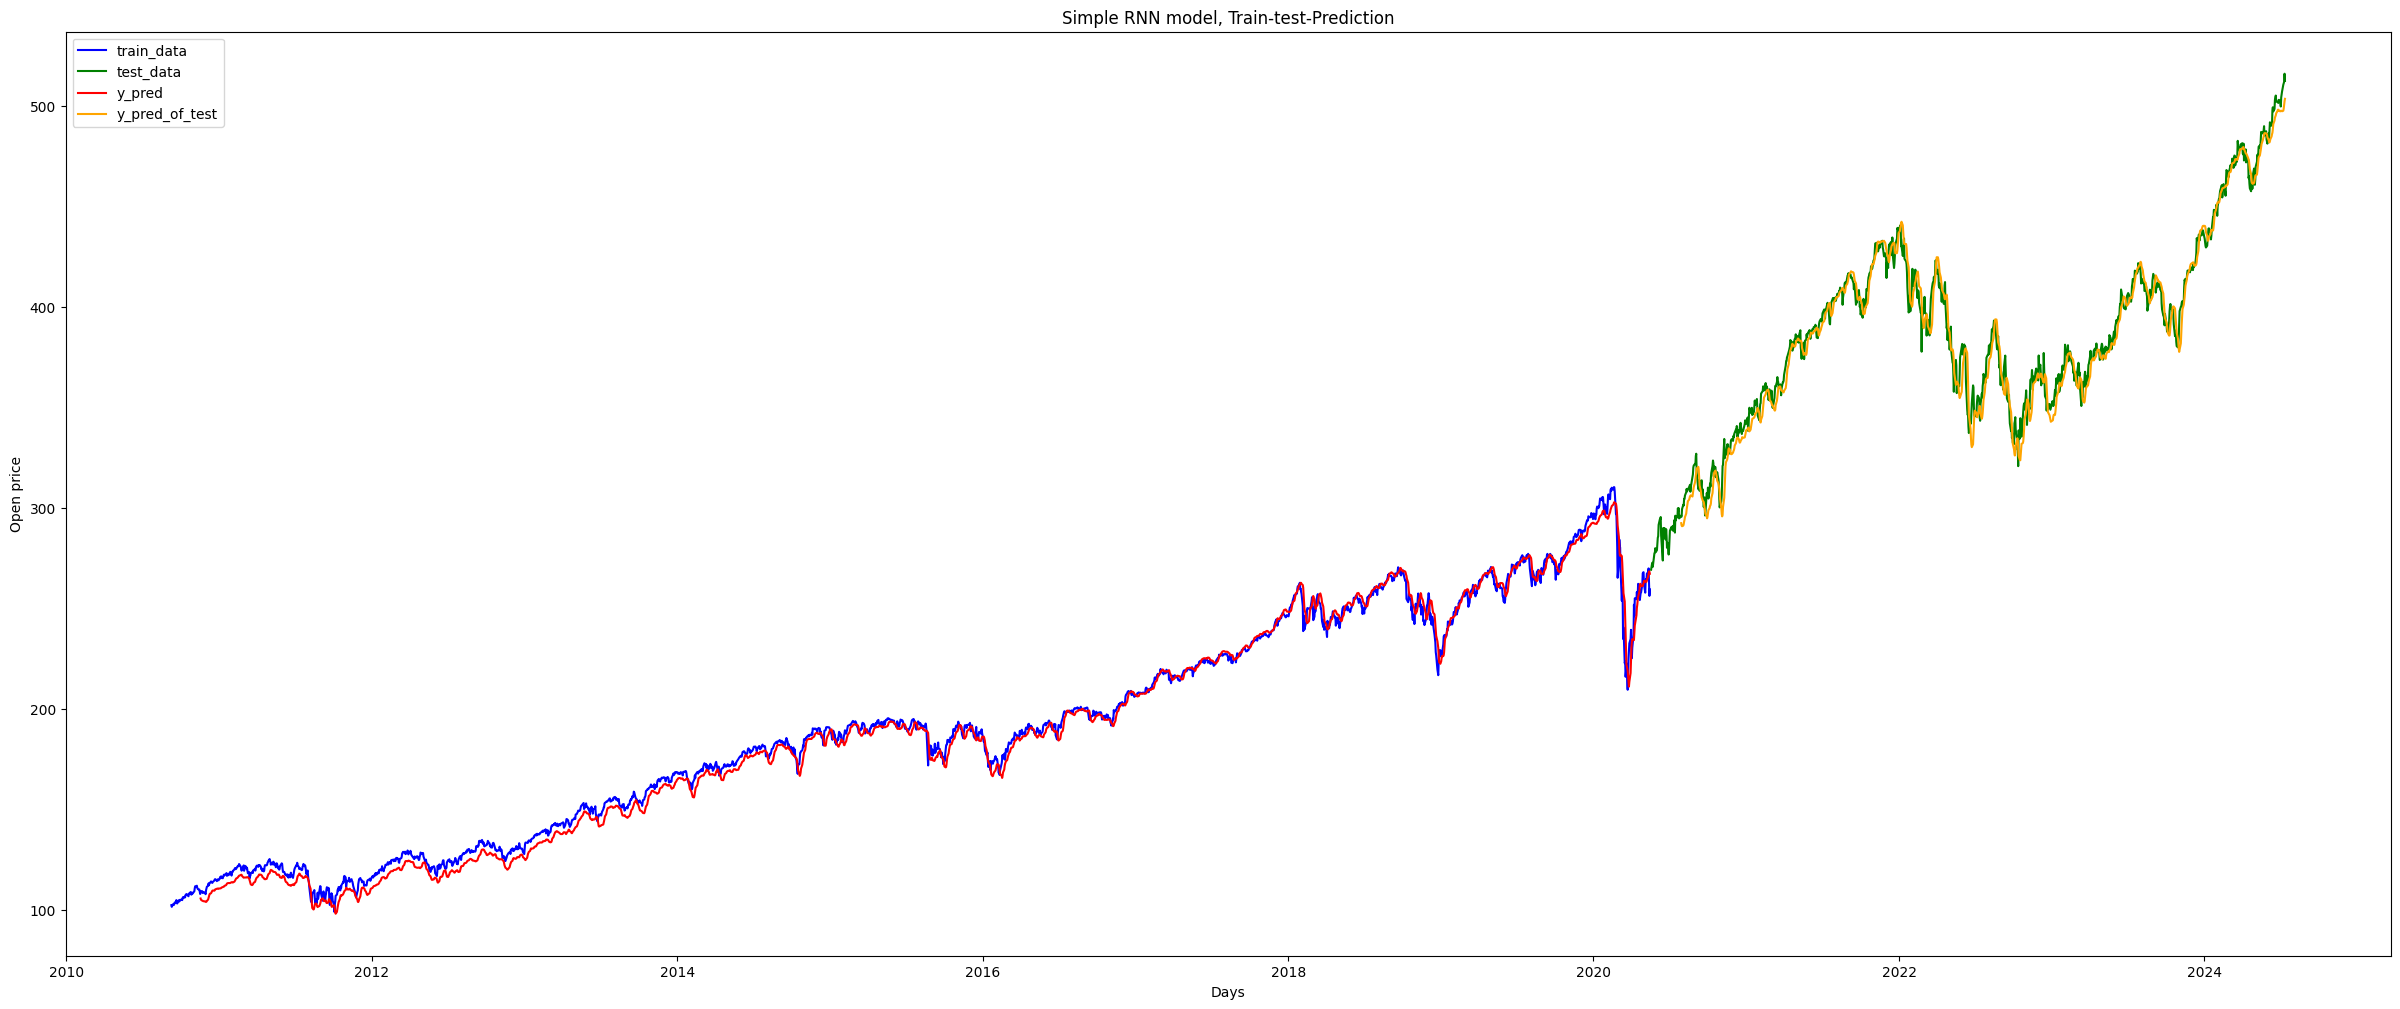

In [24]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(test_data.Date, test_data.Open, label = "test_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(test_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-test-Prediction")
plt.legend()
plt.show()

In [25]:
y_train = scaler.fit_transform(y_train)

In [26]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (x_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(x_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 3.9035e-05 - loss: 0.0213
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 5.2902e-04 - loss: 7.7368e-04
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 1.6717e-04 - loss: 6.3763e-04
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.0012 - loss: 4.0987e-04
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.0014 - loss: 3.1705e-04
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 1.4185e-04 - loss: 2.5478e-04
Epoch 7/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 1.6057e-04 - loss: 3.0969e-04
Epoch 8/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 3.6186e-04 - loss: 2.7009e-04
Epoch 9/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 7.4705e-04 - loss: 3.3787e-04
Epoch 10/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 6.4671e-04 - loss: 2.8727e-04


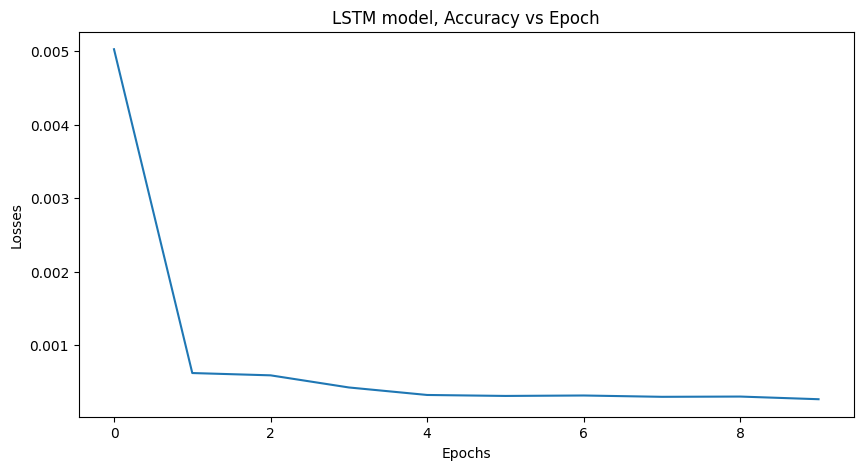

In [27]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


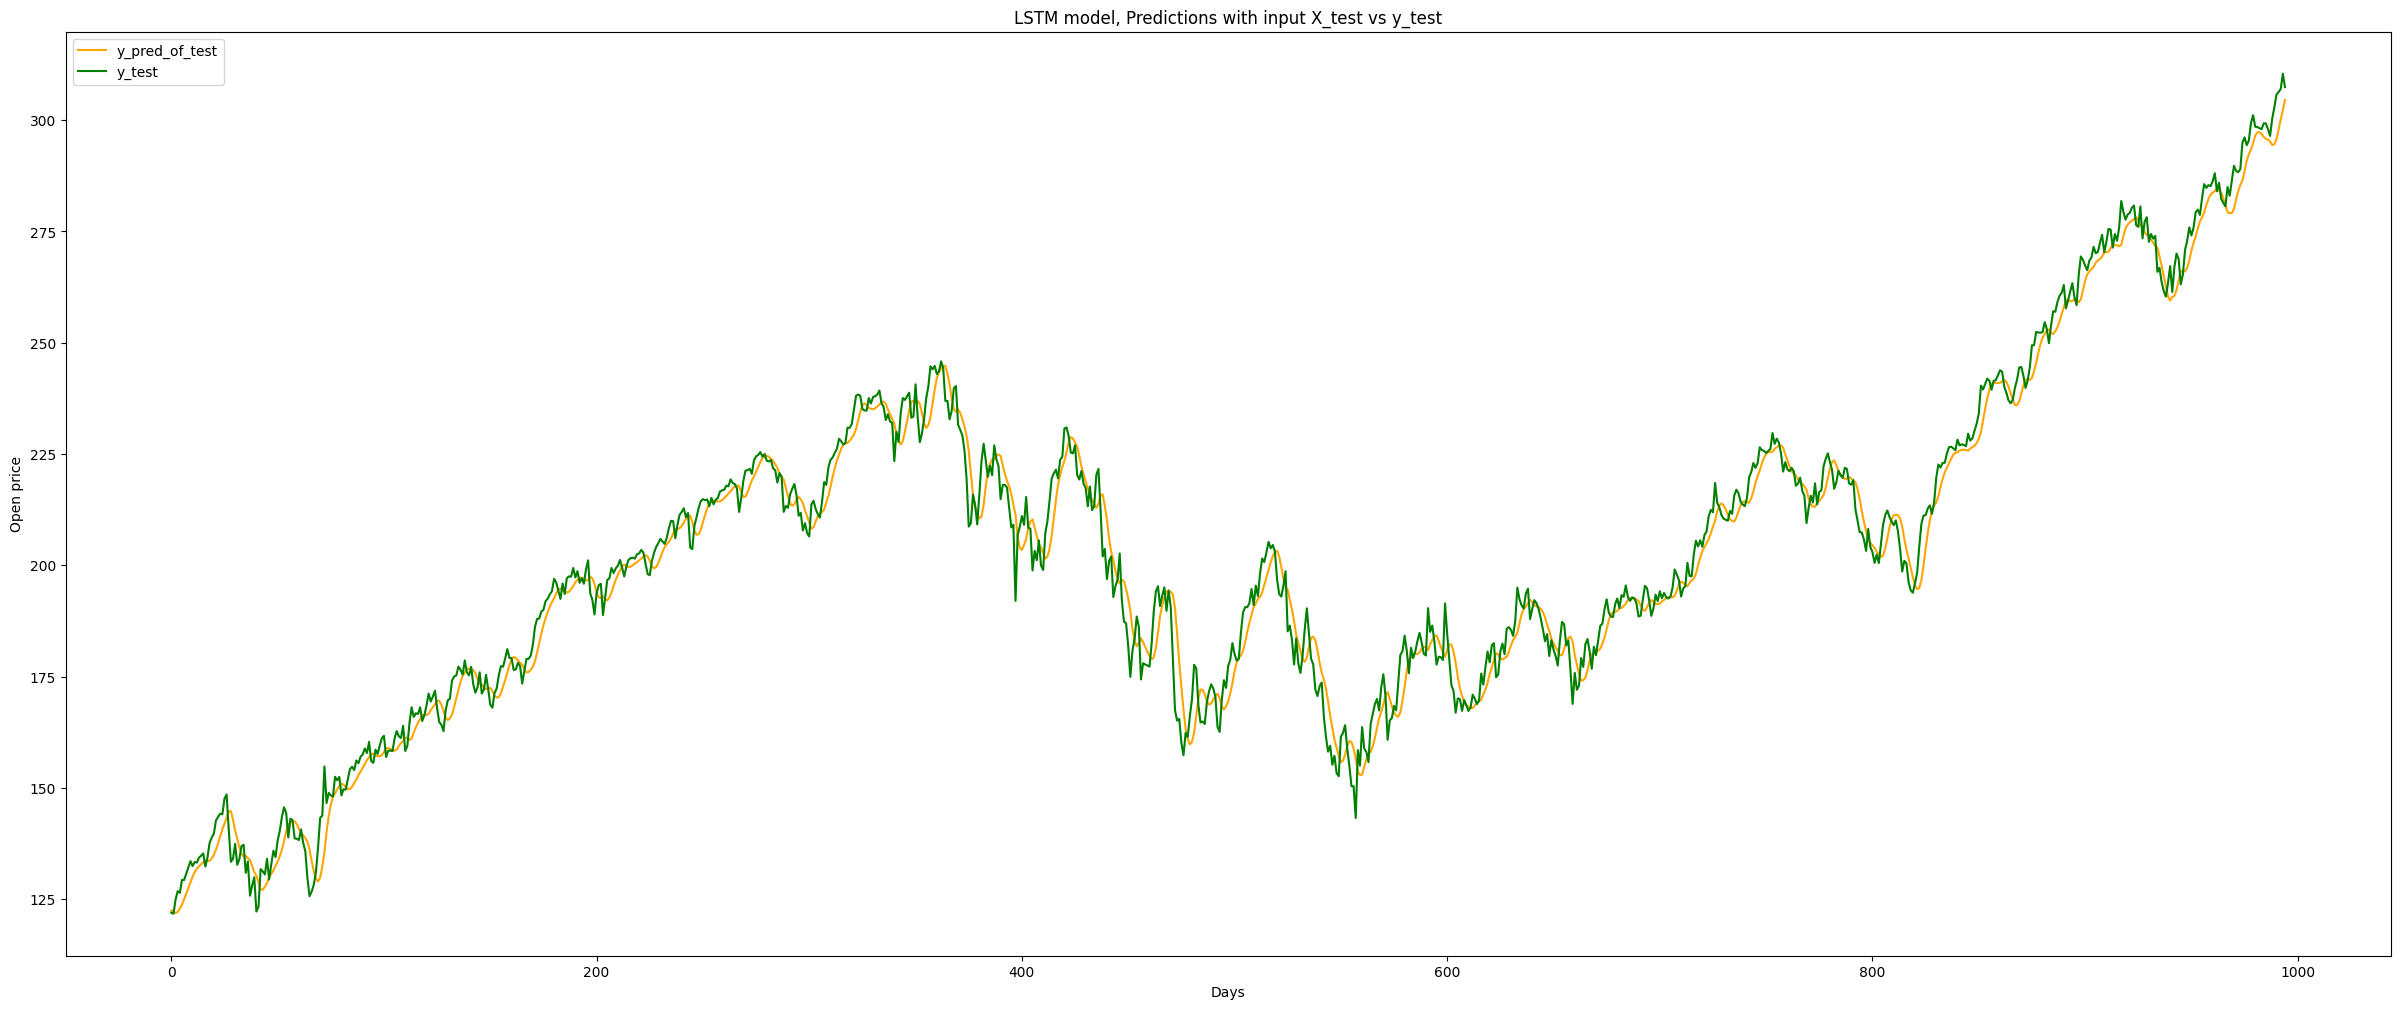

In [28]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [29]:
data.iloc[-1]

Date        07/12/24
 Open         512.49
 High         518.03
 Low          512.17
 Close        514.55
 Volume    5238170.0
Name: 0, dtype: object

In [30]:
data.columns = data.columns.str.strip()

# Print column names to ensure 'Open' exists
print("Columns in DataFrame:", data.columns)

# Check if 'Open' column is in the DataFrame
if 'Open' in data.columns:
    # Access the 'Open' column
    X_input = data.iloc[-time_step:]['Open'].values  # getting last `time_step` rows and converting to array
    X_input = scaler.fit_transform(X_input.reshape(-1, 1))  # converting to 2D array and scaling
    X_input = np.reshape(X_input, (1, time_step, 1))  # reshaping : converting to 3D array
    print("Shape of X_input:", X_input.shape)
else:
    print("'Open' column not found in DataFrame")

Columns in DataFrame: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
Shape of X_input: (1, 50, 1)


In [31]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 3/18/2017      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 3/18/2017 :", LSTM_prediction[0,0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Simple RNN, Open price prediction for 3/18/2017      : 510.19183
LSTM prediction, Open price prediction for 3/18/2017 : 513.42615


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mse, mae, mape

# Calculate metrics for RNN model
rmse_rnn, mse_rnn, mae_rnn, mape_rnn = calculate_metrics(scaler.inverse_transform(y_test), y_pred_of_test)
print("RNN Model Metrics:")
print("RMSE:", rmse_rnn)
print("MSE:", mse_rnn)
print("MAE:", mae_rnn)
print("MAPE:", mape_rnn)

# Calculate metrics for LSTM model
y_pred_lstm = model_lstm.predict(X_test)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
rmse_lstm, mse_lstm, mae_lstm, mape_lstm = calculate_metrics(scaler.inverse_transform(y_test), y_pred_lstm)
print("LSTM Model Metrics:")
print("RMSE:", rmse_lstm)
print("MSE:", mse_lstm)
print("MAE:", mae_lstm)
print("MAPE:", mape_lstm)

RNN Model Metrics:
RMSE: 105.77096482779115
MSE: 11187.497000601832
MAE: 99.21546761846973
MAPE: 20.49305498381348
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
LSTM Model Metrics:
RMSE: 1.2964029634208238
MSE: 1.680660643566294
MAE: 1.0133933420358416
MAPE: 0.20800586854295022
